<a href="https://colab.research.google.com/github/obaid5172007/code-alpha-project/blob/main/disease_probability_prediction_using_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary libraries


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset

In [43]:
dataset = pd.read_csv('heart_disease_uci.csv')
dataset = dataset.drop('dataset', axis=1)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [44]:
print(X)

[[63 'Male' 'typical angina' ... 'downsloping' 0.0 'fixed defect']
 [67 'Male' 'asymptomatic' ... 'flat' 3.0 'normal']
 [67 'Male' 'asymptomatic' ... 'flat' 2.0 'reversable defect']
 ...
 [55 'Male' 'asymptomatic' ... nan nan 'fixed defect']
 [58 'Male' 'asymptomatic' ... nan nan nan]
 [62 'Male' 'atypical angina' ... nan nan nan]]


In [45]:
print(y)

[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1
 1 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0
 0 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1
 0 0 2 1 2 0 3 1 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0
 0 3 1 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0
 1 0 3 0 0 4 2 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 0 1 0 2 2 1 0
 3 1 1 2 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 

#Visualizing the dataset

In [46]:
dataset.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#Taking care of missing values

locating columns with missing values

In [47]:
print(dataset.isnull().sum())

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


filling spaces with SimpleImputer

In [48]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
columns_to_impute = ['fbs', 'thalch', 'exang', 'slope', 'thal']

for col in columns_to_impute:
    col_index = dataset.columns.get_loc(col) - 1
    X[:, col_index:col_index + 1] = imputer.fit_transform(X[:, col_index:col_index + 1])

In [49]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute_mean = ['trestbps', 'chol', 'oldpeak', 'ca']

for col in columns_to_impute_mean:
    col_index = dataset.columns.get_loc(col) - 1
    X[:, col_index:col_index + 1] = imputer_mean.fit_transform(X[:, col_index:col_index + 1])

#Encoding categorical variables

LabelEncoding sex, cp, fbs, restecg, exang, slope and thal columns

In [50]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    le = LabelEncoder()
    X[:, dataset.columns.get_loc(col) -1] = le.fit_transform(X[:, dataset.columns.get_loc(col) -1].astype(str))

binarizing target column

In [51]:
import numpy as np

y = np.where(y > 0, 1, 0)

In [52]:
print(X)

[[63 1 3 ... 0 0.0 0]
 [67 1 0 ... 1 3.0 1]
 [67 1 0 ... 1 2.0 2]
 ...
 [55 1 0 ... 1 0.6763754045307443 0]
 [58 1 0 ... 1 0.6763754045307443 1]
 [62 1 1 ... 1 0.6763754045307443 1]]


In [53]:
print(y)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 

#Splitting the dataset into Training set and Test set

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Applying Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying XG Boost Classification

In [56]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#Applying K_Fold_Cross_Validation

In [57]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
classifier = XGBClassifier()
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = cross_val_score(classifier, X_train, y_train, cv=kfold)
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation scores: [0.83783784 0.74324324 0.82432432 0.81081081 0.7972973  0.82432432
 0.80821918 0.73972603 0.8630137  0.82191781]
Mean cross-validation accuracy: 0.8070714550166604


#Using GridSearch CV for best hyperparameter tuning and selection

In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
classifier = XGBClassifier()
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_parameters)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8247871158830063


#Making confusion matrix

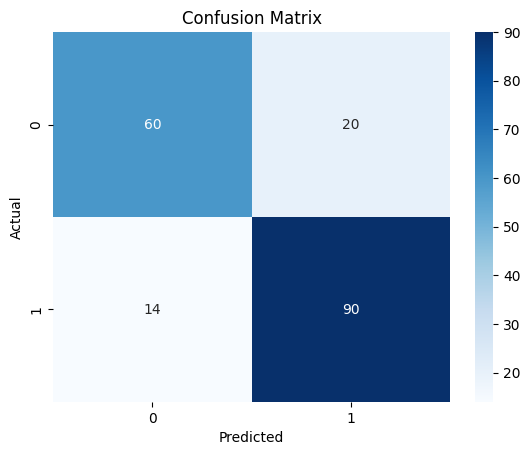

In [59]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Visualizing categorical features


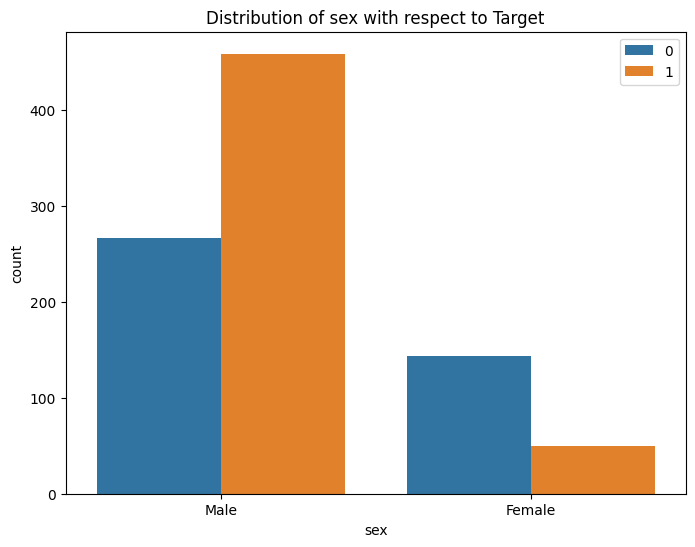

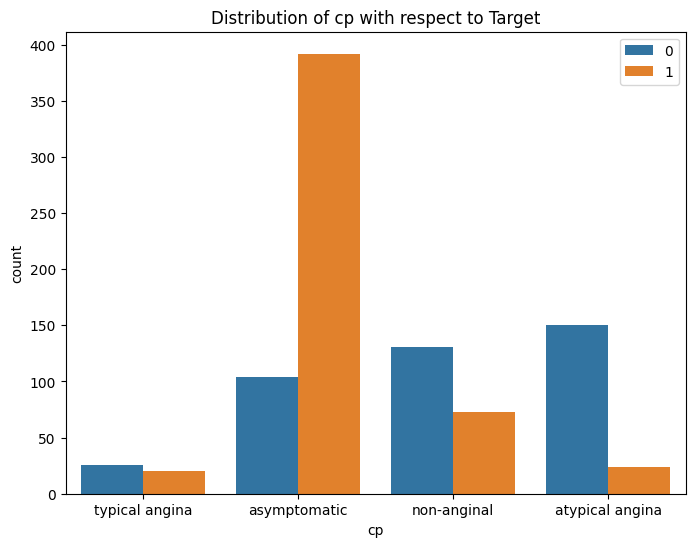

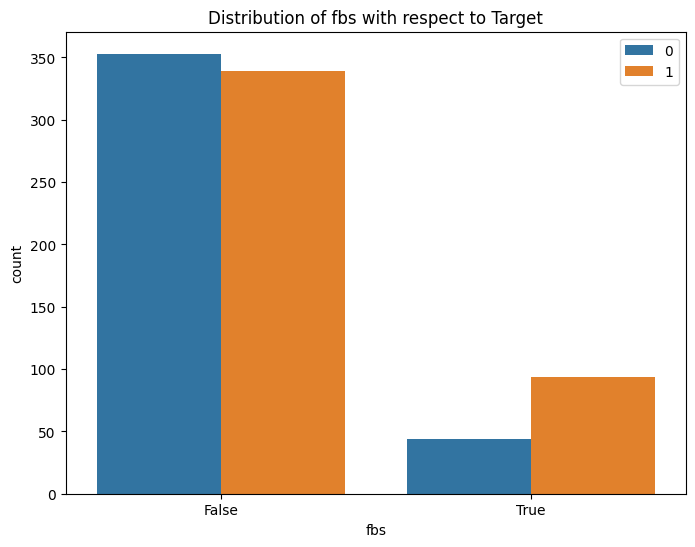

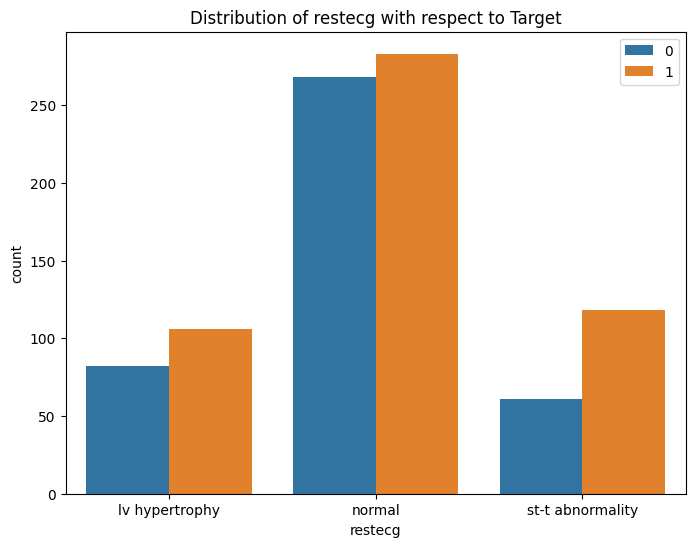

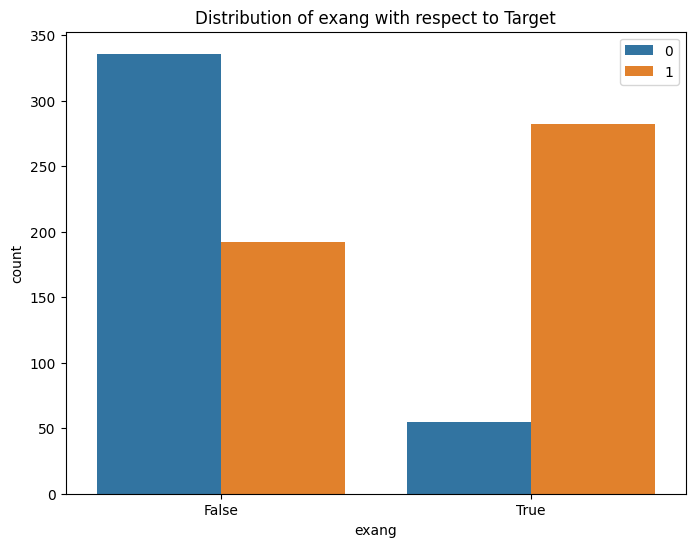

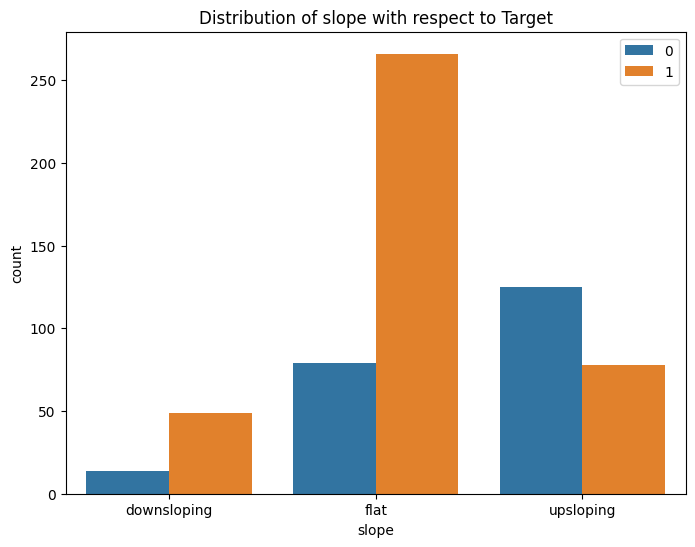

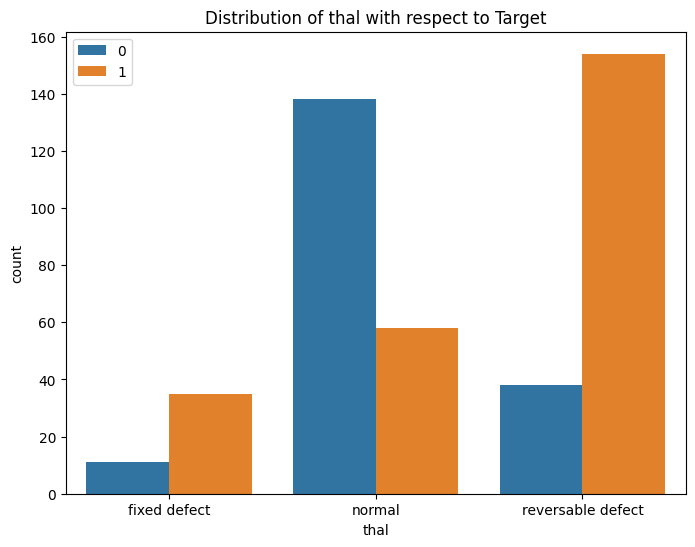

In [61]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue=y, data=dataset)
    plt.title(f'Distribution of {col} with respect to Target')
    plt.show()

#Visualizing numerical features




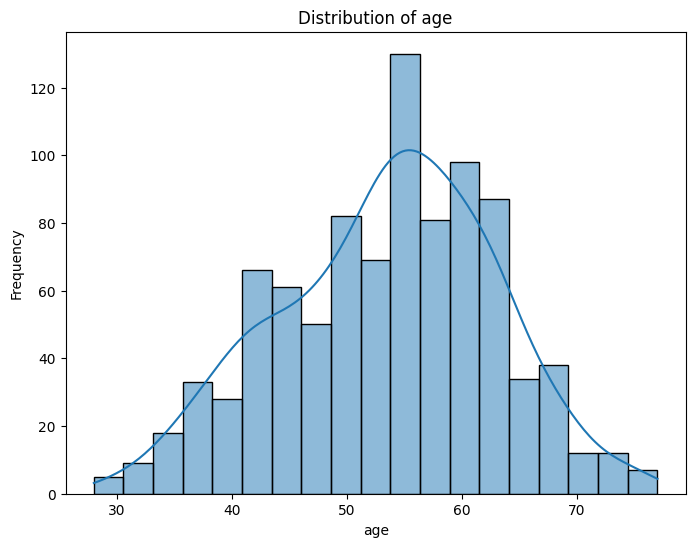

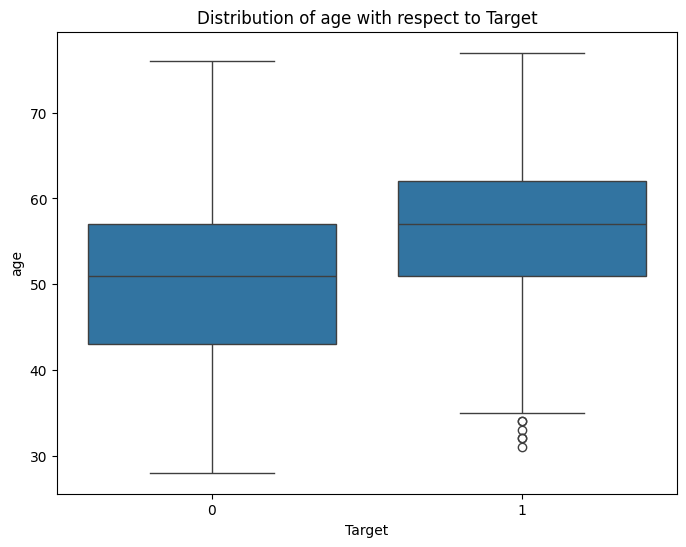

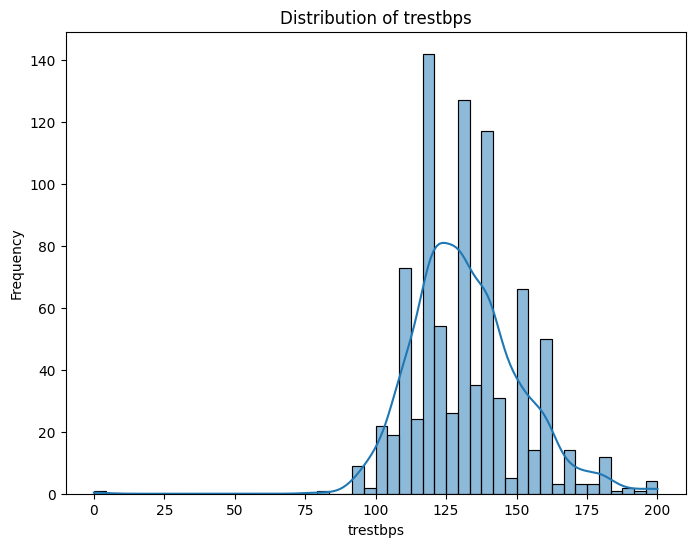

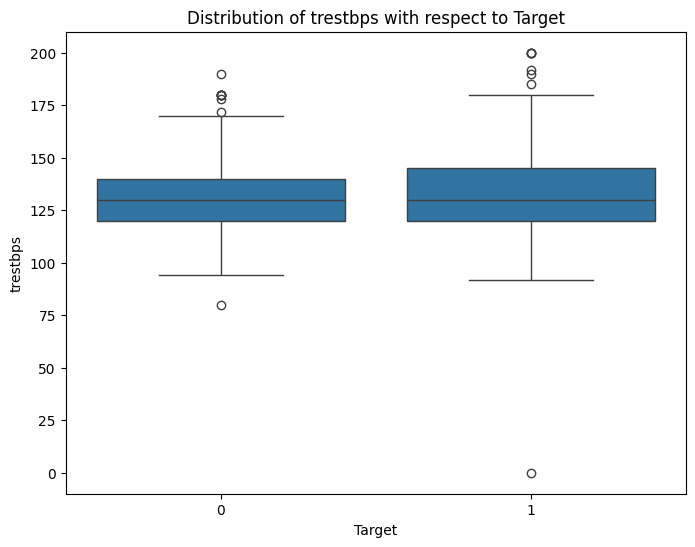

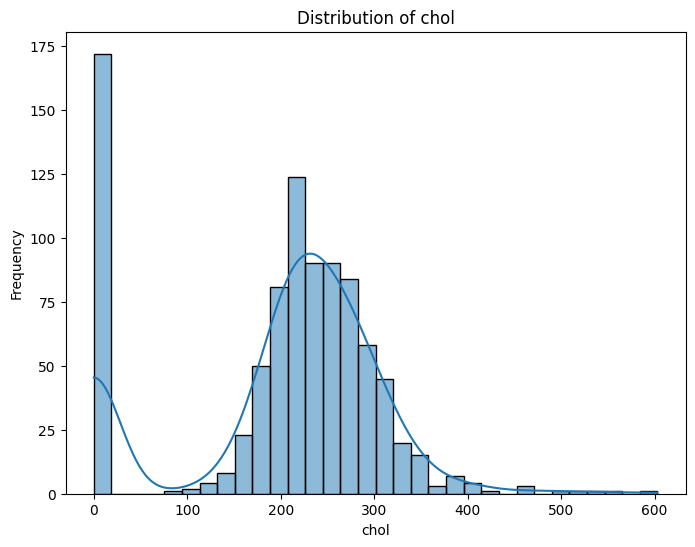

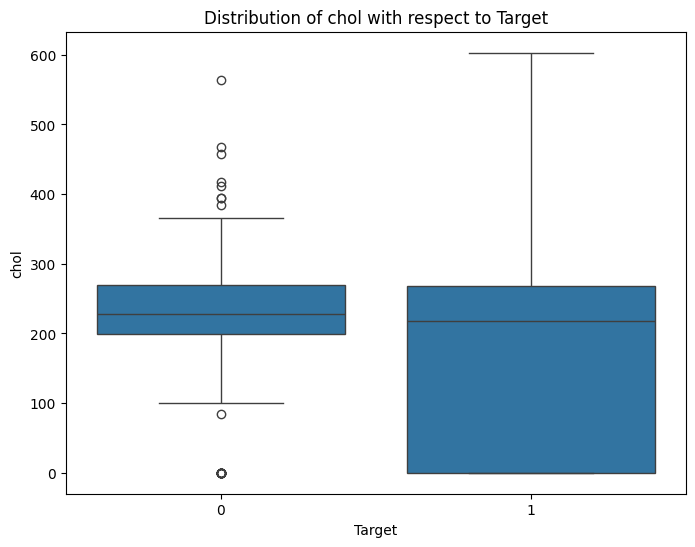

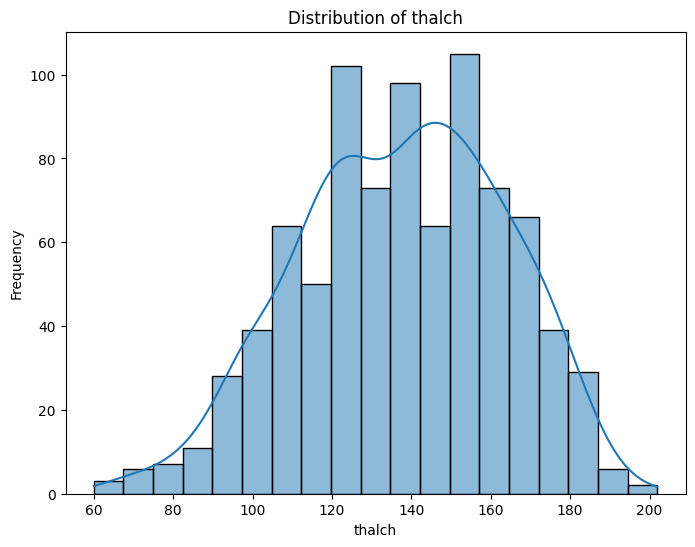

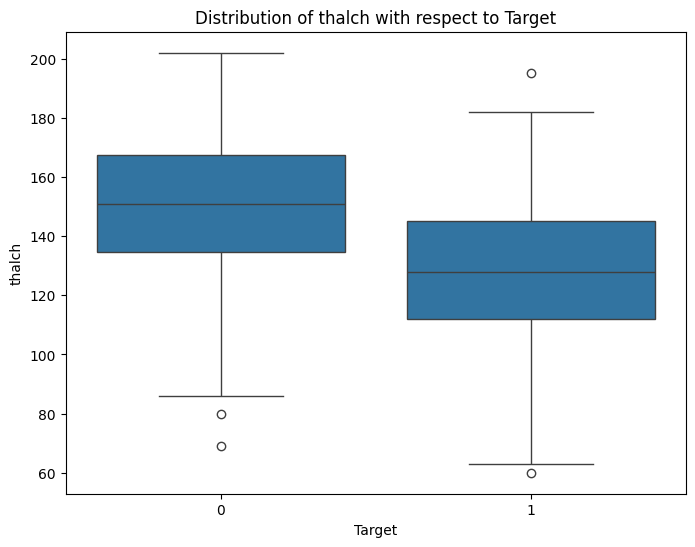

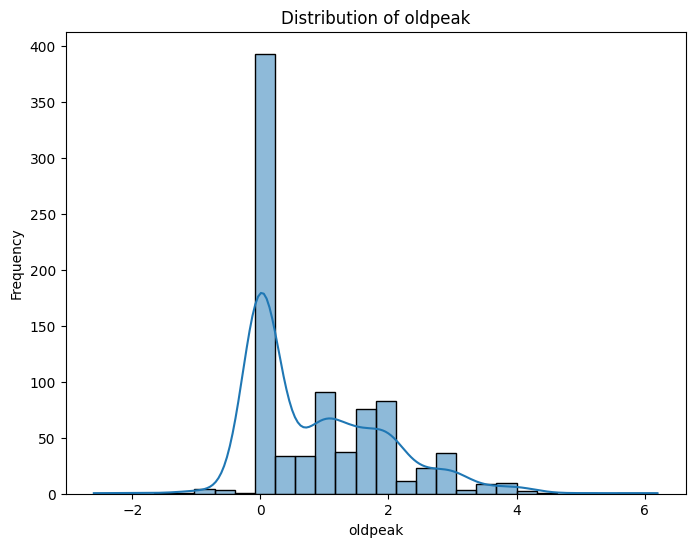

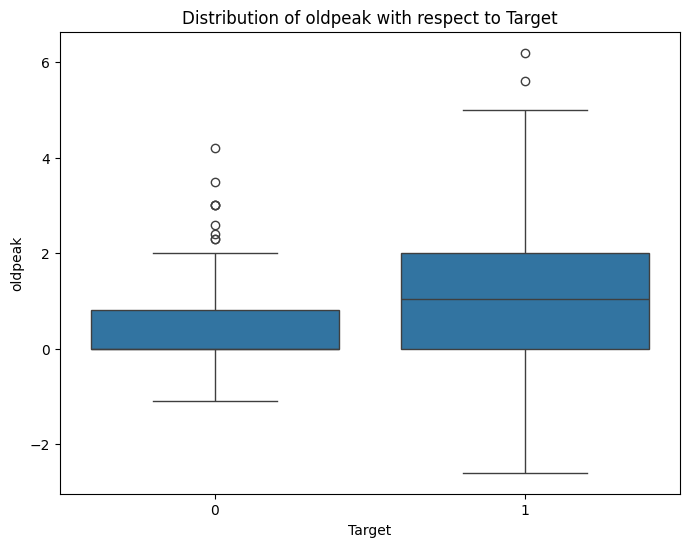

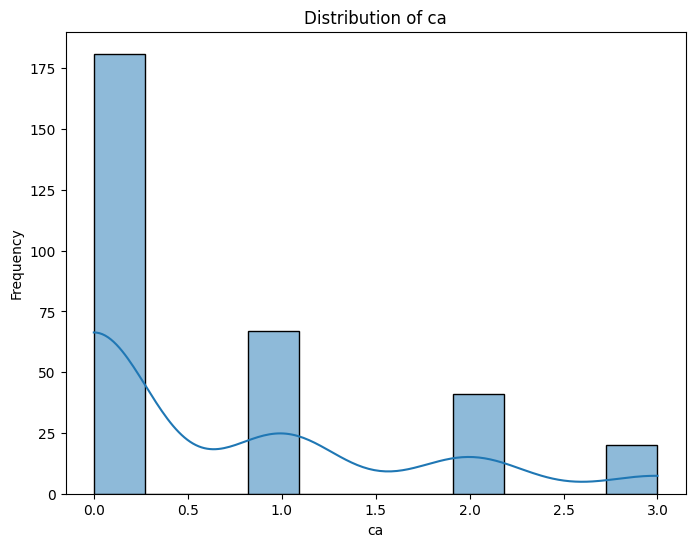

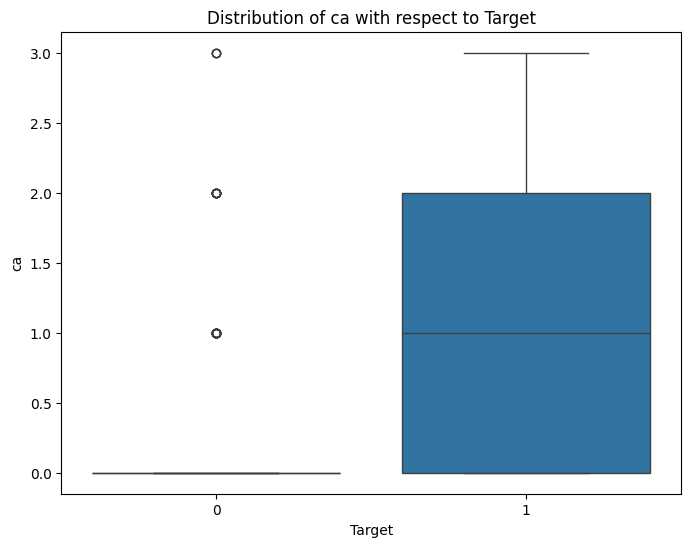

In [62]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=y, y=dataset[col])
    plt.title(f'Distribution of {col} with respect to Target')
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.show()

# Visualizing correlations


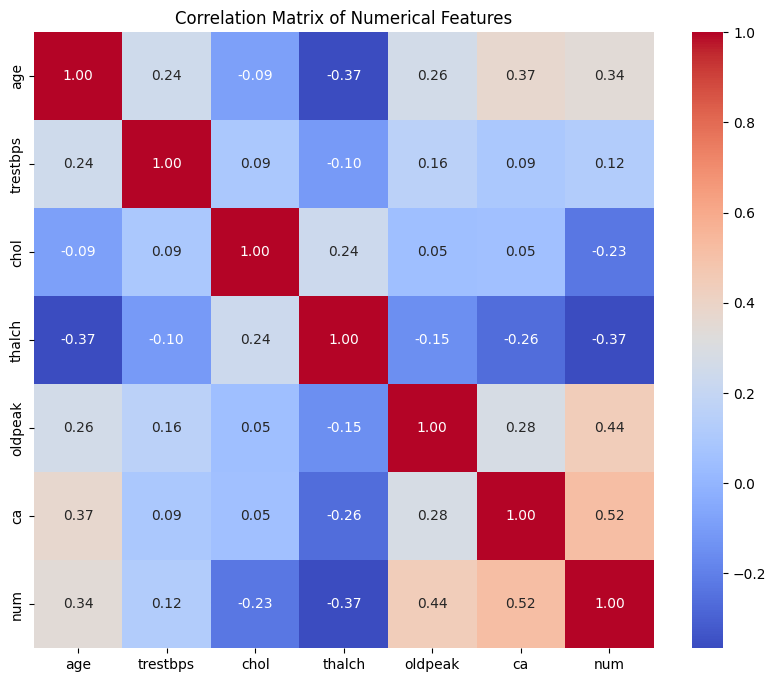

In [63]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
correlation_matrix = dataset[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()